In [1]:
import pandas as pd
from mlflow.tracking import MlflowClient
import numpy as np

from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc, get_out_dirs
from src.database.mlflow import MLFlowClient
from src.database.mlflow import MLFlowClient
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')

from mlflow.tracking import MlflowClient
from src.database.mlflow import MLFlowClient
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/data_analysis/analysis_helpers.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from pandas import np


In [2]:
runs_bp_smo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.number_clusters","params.max_epochs", "params.learning_rate", "params.optimizer", "params.beta"],[True, True, True, True, True, True, True, True],["bp_smo_canceled", "entropy", "w_kmeans",10, 30, 0.01, "Adam",10])
print(len(runs_bp_smo))
#all_run_ids_smo = get_run_ids(runs_bp_smo)
run_ids_smo = get_run_ids(runs_bp_smo.head(5))
#nochmal mit tail ausgeben und schauen, ob es einen großen Unterschied macht

10


In [3]:
runs_bp_lmo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.max_epochs", "params.learning_rate", "params.beta"],[True, True, True, True, True, True],["bp_lmo_canceled", "entropy", "w_kmeans", 30, 0.01, 10])
print(len(runs_bp_lmo))
#run_ids_bp_lmo = get_run_ids(runs_bp_lmo)
run_ids_bp_lmo = get_run_ids(runs_bp_lmo.head(5))
run_ids_bp_lmo

10


0    8c92935a5c9540f19877d223298b82a7
1    31b9257c8d164ab8ba071da8f9a0df2b
2    5eb3132aaa494ad39da6e9899f4609dc
3    2cb102adbaf448bfbf96c684b98c718d
4    9df7b7bfab5447b48e7fff077162451e
Name: run_id, dtype: object

In [4]:
runs_centroids = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.optimizer", "params.beta"],[True, True, True, True, True, True, True, True],["centroids", "entropy", "w_kmeans",1000, 30, 0.01, "Adam", 10])
print(len(runs_centroids))
#run_ids_centroids = get_run_ids(runs_centroids)
run_ids_centroids = get_run_ids(runs_centroids.head(5))
run_ids_centroids

10


0    3be132cd52a54c81b8d8941bfb205da2
1    c244b175772c444e8569c7f227aa0e2d
2    64c4b12a887c45feab506384165381f3
3    55e4b5f945e44407ac049154be92a3be
4    5304540fe05a4848a6aa79f57b29e7af
Name: run_id, dtype: object

In [5]:
runs_bp_clusterwise = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.number_clusters", "params.beta"],[True, True, True, True, True, True, True, True],["bp_prop_clustersize", "entropy", "w_kmeans",1000, 30, 0.01, 10, 10])
print(len(runs_bp_clusterwise))
#run_ids_bp_clusterwise = get_run_ids(runs_bp_clusterwise)
run_ids_bp_clusterwise = get_run_ids(runs_bp_clusterwise.head(5))
run_ids_bp_clusterwise

10


0    a65003f9292d4228a02f23190bfcea9e
1    a466c659501141bca4253116696d142b
2    20dde4fdfd4544c9b77a91583b010baf
3    64782934990649a9bd1e61692bb6b6be
4    99985661309741a1b5817e7d3a7c4618
Name: run_id, dtype: object

In [6]:
runs_boundary = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k", "params.learning_rate", "params.max_epochs", "params.number_clusters", "params.beta"],[True, True, True, True, True, True, True, True],["boundary_points", "entropy", "w_kmeans",1000, 0.01, 30, 10, 10])
print(len(runs_boundary))
#run_ids_boundary = get_run_ids(runs_boundary)
run_ids_boundary = get_run_ids(runs_boundary.head(5))
run_ids_boundary

10


0    73e8ddce07304be6a6501f4c679cace7
1    55d32db47a6d4a1a8e4bcaa7edae76f5
2    cd6ec3dfb9f144518302dfcb8a69ba5f
3    505ff301c6224d288cc74b3a88858129
4    91eca2ff60644eeea0a013a8bf445603
Name: run_id, dtype: object

In [7]:
runs_random = db.get_entries(['params.diversity_strategy', "params.learning_rate", "params.max_epochs", "params.sampling_size"],[True, True, True, True],["random", 0.01, 30, 1000])
print(len(runs_random))
#run_ids_random = get_run_ids(runs_random)
run_ids_random = get_run_ids(runs_random.head(5))
run_ids_random

10


0    7f1e5628b6334cc3a9de37e61104358d
1    421ff61556e5461f97a973fa111c3c63
2    ae5681ec87874fbda5bd998ad8c13970
3    1437f6a0f73a4039ad88d8c63b54f84c
4    d2a0054c9b594e3cb78e9adb27ac6157
Name: run_id, dtype: object

In [8]:
runs_random_uncertainty = db.get_entries(['params.diversity_strategy', "params.learning_rate", "params.max_epochs", "params.sampling_size", "params.beta", "params.uncertainty"],[True, True, True, True, True, True],["random_uncertainty", 0.01, 30, 1000, 10, "entropy"])
print(len(runs_random_uncertainty))
#run_ids_random = get_run_ids(runs_random)
run_ids_random_uncertainty = get_run_ids(runs_random_uncertainty.head(5))
run_ids_random_uncertainty

10


0    7b682c80039a4200929f600dfc0e3915
1    500eed2b3f744121addd386a3131f675
2    67d2a40a37754c2eb6ee63b11271c011
3    eb880329b93e415c924310ecd34b8407
4    d14a3e0009f640b880ef5d68d7d12e50
Name: run_id, dtype: object

In [9]:
samples_labeled_bp_smo, avg_accs_bp_smo = get_labeledSamples_avgAcc(run_ids_smo, tracking)
samples_labeled_bp_lmo, avg_accs_bp_lmo = get_labeledSamples_avgAcc(run_ids_bp_lmo, tracking)
samples_labeled_centroids, avg_accs_centroids = get_labeledSamples_avgAcc(run_ids_centroids, tracking)
samples_labeled_clusterwise, avg_accs_clusterwise = get_labeledSamples_avgAcc(run_ids_bp_clusterwise, tracking)
samples_labeled_boundary, avg_accs_boundary = get_labeledSamples_avgAcc(run_ids_boundary, tracking)
samples_labeled_random, avg_accs_random = get_labeledSamples_avgAcc(run_ids_random, tracking)
samples_labeled_random_uncertain, avg_accs_random_uncertain = get_labeledSamples_avgAcc(run_ids_random_uncertainty, tracking)

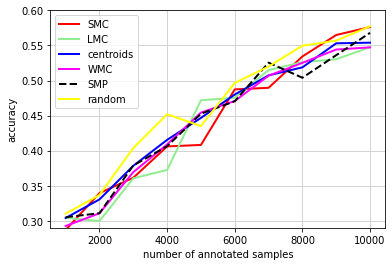

In [10]:
# plot
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='red', label='SMC', linewidth=2)
plt.plot(samples_labeled_bp_lmo, avg_accs_bp_lmo,color='lightgreen', label='LMC', linewidth=2)
plt.plot(samples_labeled_centroids, avg_accs_centroids,color='blue', label='centroids', linewidth=2)
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='WMC', linewidth=2)
plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='SMP', linestyle='--',linewidth=2)
plt.plot(samples_labeled_random, avg_accs_random,color='yellow', label='random',linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.60])

plt.show()

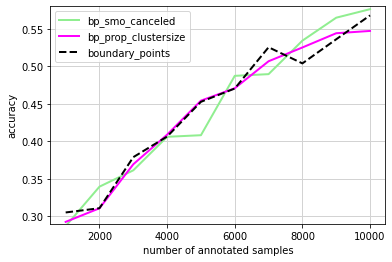

In [11]:
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='lightgreen', label='bp_smo_canceled', linewidth=2)
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='bp_prop_clustersize', linewidth=2)
plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='boundary_points', linestyle='--',linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.58])

plt.show()

In [12]:
print(f'bp_smo: {avg_accs_bp_smo}')
print(f'bp_lmo: {avg_accs_bp_lmo}')

bp_smo: [0.28686 0.33954 0.36132 0.40602 0.40816 0.48732 0.4896  0.53426 0.56488
 0.57624]
bp_lmo: [0.3042  0.29964 0.36054 0.37246 0.47182 0.4754  0.51482 0.5262  0.53032
 0.54756]


In [13]:
avg_accs_centroids

array([0.304  , 0.3305 , 0.37842, 0.41536, 0.44668, 0.47998, 0.50734,
       0.51876, 0.55302, 0.55392])

In [14]:
avg_accs_boundary

array([0.30512, 0.3108 , 0.3789 , 0.40634, 0.4527 , 0.47042, 0.52546,
       0.50394, 0.5361 , 0.56796])

In [15]:
avg_accs_bp_smo

array([0.28686, 0.33954, 0.36132, 0.40602, 0.40816, 0.48732, 0.4896 ,
       0.53426, 0.56488, 0.57624])

In [16]:
avg_accs_bp_lmo

array([0.3042 , 0.29964, 0.36054, 0.37246, 0.47182, 0.4754 , 0.51482,
       0.5262 , 0.53032, 0.54756])

In [17]:
avg_accs_clusterwise

array([0.29258, 0.31072, 0.3694 , 0.4089 , 0.45424, 0.47076, 0.5068 ,
       0.52516, 0.54416, 0.54722])

In [18]:
avg_accs_random

array([0.31016, 0.33688, 0.40374, 0.45186, 0.43506, 0.49656, 0.51994,
       0.54958, 0.55688, 0.57726])

In [19]:
avg_accs_random_uncertain

array([0.29642, 0.34208, 0.3948 , 0.3944 , 0.44284, 0.49476, 0.47034,
       0.52338, 0.52708, 0.56386])